In [6]:
import numpy as np
from scipy.special import eval_genlaguerre, genlaguerre
from scipy.integrate import quad
from scipy.special import factorial, factorial2

N = 25
mu = 1000
nu = 1

# Parte confrontata 
omega = 2*nu/mu

E = dict()

prefac = [np.sqrt(
            np.sqrt( 2* np.power(nu, 3)/np.pi) * \
            ( np.power(2, n+3)*factorial(n)/factorial2(2*n+1))) for n in range(N)]

def phi(r, n):
    return prefac[n]*np.exp( -nu* np.power(r, 2) ) * \
           eval_genlaguerre(n, 0.5, 2*nu*np.power(r, 2) )


def V(r):
    return -nu*omega*np.power(r,2) + \
            np.power(r, -1)*(7.39*np.exp(-1*3.11*r) - 3.22*np.exp(-1.555*r))

def integrand(r, i, j):
    ret = np.power(r, 2) * V(r) * phi(r, i)  * phi(r, j)
    return ret

def norm(r, i, j):
    ret = phi(r, i) * phi(r, j)
    return ret

In [7]:
H = np.zeros((N,N))
for i in range(H.shape[0]):
    for j in range(i, H.shape[1]):
        int_f, err = quad(integrand, 0, 100, args=(i, j), limit=100)

        H[i, j] = int_f
        H[j, i] = H[i, j]

        if i == j:
            H[i, j] += omega*(2*i + 1.5)

E[str(nu)] = np.zeros(N)

for i in range(N, 0, -1):
    eigenvalues, eigenvectors = np.linalg.eig(H[:i, :i])
    E[str(nu)][i-1] = np.min(eigenvalues)

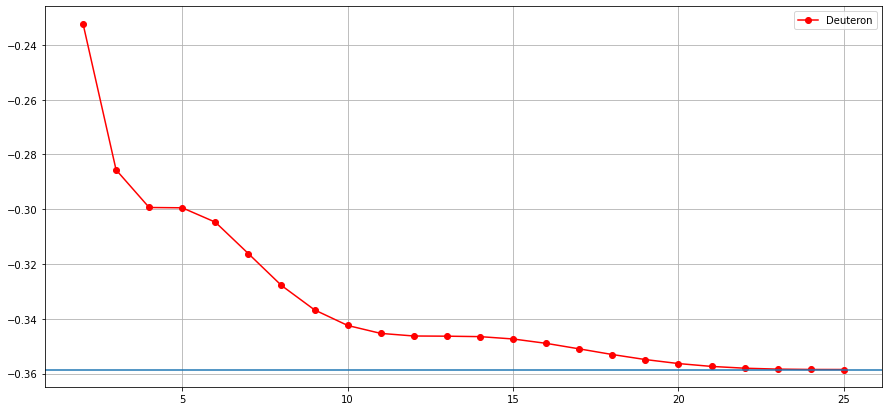

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

plt.plot(range(2, N+1), E[str(nu)][1:], marker='o',
                     color='red', label="Deuteron");
    
plt.axhline(-0.35852776)
plt.legend()
plt.grid();

In [9]:
E

{'1': array([ 0.37977175, -0.2322012 , -0.28562152, -0.2993647 , -0.29947612,
        -0.30471819, -0.3162215 , -0.32785038, -0.33676119, -0.34244726,
        -0.34533995, -0.34629346, -0.34635785, -0.34652188, -0.34737985,
        -0.34897587, -0.35099453, -0.35305997, -0.35489716, -0.3563589 ,
        -0.35740127, -0.35805285, -0.35838915, -0.35851154, -0.35852776])}

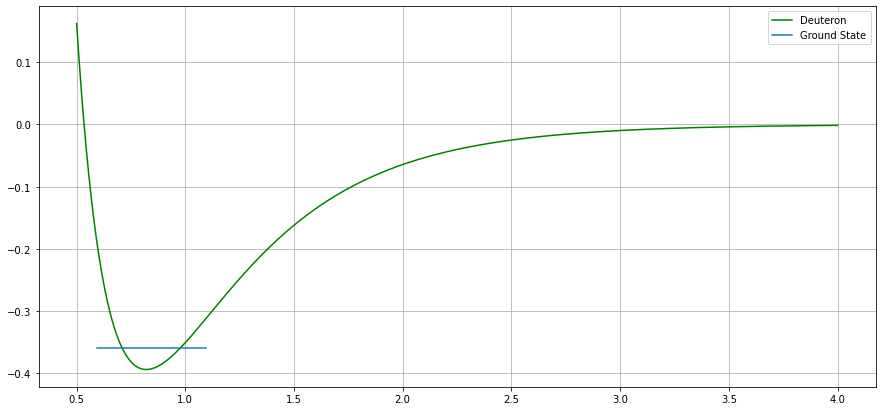

In [10]:
plt.figure(figsize=(15, 7))

x = np.linspace(0.5, 4, num=1000000)
plt.plot(x, np.power(x, -1)*(7.39*np.exp(-1*3.11*x) - 3.22*np.exp(-1.555*x)),
                                             color='green', label="Deuteron");
    
plt.axhline(-0.35852776, 0.07, 0.2, label="Ground State")
plt.legend()
plt.grid();